In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import lead_lag

In [3]:
df = pd.read_csv('QA-DS-TASK-DATA-FROM-2020-REDUCED-COLUMNS.csv')

In [4]:
display(df.head(3))
df.columns = ['ts','close','ticker']
pv = df.pivot_table(values='close',index='ts',columns='ticker',aggfunc=sum)
pv.columns = ['10Y_tr','sp500','ch_a50']
pv['dt'] = pd.to_datetime(pv.index).date
pv['month'] = pv['dt'].to_numpy().astype('datetime64[M]')
pv['hour'] = pd.to_datetime(pv.index).hour
display(pv.head(3))

Timestamp  Close Candle               Ticker Full Name
0  2020-01-01 18:01:00       128.312  10 YEAR TREASURY NOTE FUTURES
1  2020-01-01 18:02:00       128.312  10 YEAR TREASURY NOTE FUTURES
2  2020-01-01 18:03:00       128.312  10 YEAR TREASURY NOTE FUTURES

10Y_tr    sp500  ch_a50          dt      month  hour
ts                                                                        
2020-01-01 18:01:00  128.312  3236.25     NaN  2020-01-01 2020-01-01    18
2020-01-01 18:02:00  128.312  3234.75     NaN  2020-01-01 2020-01-01    18
2020-01-01 18:03:00  128.312  3235.25     NaN  2020-01-01 2020-01-01    18

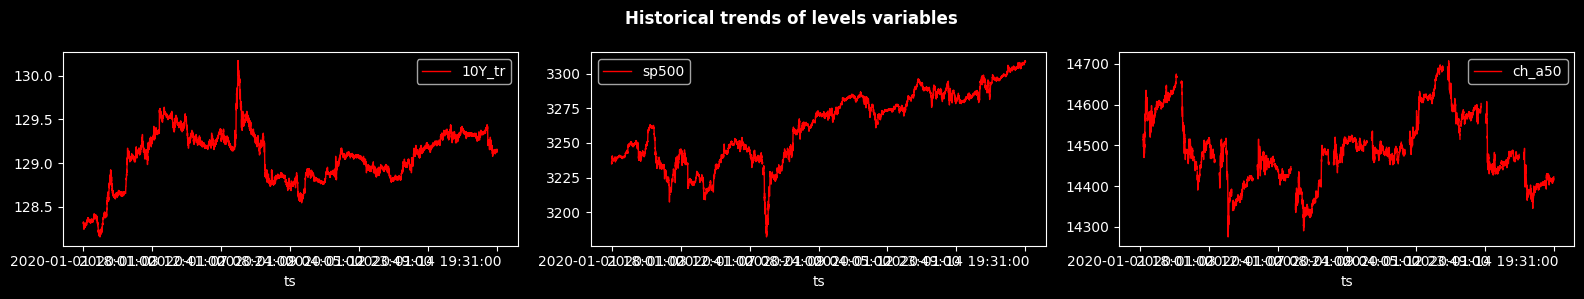

In [5]:
# pv.plot()
X = pv[['10Y_tr','sp500','ch_a50']][:15000] # subset of data
plt.style.use('dark_background')
def plot_vars(train, levels, color, leveltype):
    
    """
    Displays historical trends of variables
    And see if it's sensible to just select levels instead of differences
    """
    fig, ax = plt.subplots(1, 3, figsize=(16,3), sharex=True)
    for col, i in dict(zip(levels, list(range(3)))).items():
        X[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    fig.suptitle(f"Historical trends of {leveltype} variables", 
                 fontsize=12, fontweight="bold")
    
plot_vars(X.values, levels = X.columns, color="red", leveltype="levels")
plt.tight_layout()

In [6]:
def give_shift_col_df(df, col_name, shift = 1):
    df[f'{col_name}_div'] = (df[col_name] - df[col_name].shift(shift)) / df[col_name].shift(shift)
    df[f'{col_name}_diff'] = (df[col_name] - df[col_name].shift(shift))
    return df

In [7]:
pv = give_shift_col_df(pv, '10Y_tr', shift = 1)
pv = give_shift_col_df(pv, 'sp500', shift = 1)
pv = give_shift_col_df(pv, 'ch_a50', shift = 1)

In [8]:
# Графики оказались бесполезными
# df = temp.dropna()
# df = df[df['10Y_tr_div'] != 0]
# for i in range(-5,5,1):
#     if i == 0: continue
#     arr = df['sp500_div']*df['10Y_tr_div'].shift(i)
#     arr = arr[(arr < 0.5*10**-6) & (arr > -0.5*10**-6)]
#     plt.hist(arr, bins=100)
#     plt.title(f'Shift = {i}')
#     plt.grid()
#     plt.show()

In [9]:
pv

10Y_tr    sp500   ch_a50          dt      month  hour  \
ts                                                                            
2020-01-01 18:01:00  128.312  3236.25      NaN  2020-01-01 2020-01-01    18   
2020-01-01 18:02:00  128.312  3234.75      NaN  2020-01-01 2020-01-01    18   
2020-01-01 18:03:00  128.312  3235.25      NaN  2020-01-01 2020-01-01    18   
2020-01-01 18:04:00  128.312  3236.00      NaN  2020-01-01 2020-01-01    18   
2020-01-01 18:05:00  128.328  3235.50      NaN  2020-01-01 2020-01-01    18   
...                      ...      ...      ...         ...        ...   ...   
2021-11-30 23:55:00      NaN  4605.75  15390.0  2021-11-30 2021-11-01    23   
2021-11-30 23:56:00      NaN  4606.75  15390.0  2021-11-30 2021-11-01    23   
2021-11-30 23:57:00      NaN  4606.50  15388.0  2021-11-30 2021-11-01    23   
2021-11-30 23:58:00      NaN  4606.50  15390.0  2021-11-30 2021-11-01    23   
2021-11-30 23:59:00      NaN  4606.50  15393.0  2021-11-30 2021-11-01    23   

                     10Y_tr_div  10Y_tr_diff  sp500_div  sp500_diff  \
ts                                                                    
2020-01-01 18:01:00         NaN          NaN        NaN         NaN   
2020-01-01 18:02:00    0.000000        0.000  -0.000463       -1.50   
2020-01-01 18:03:00    0.000000        0.000   0.000155        0.50   
2020-01-01 18:04:00    0.000000        0.000   0.000232        0.75   
2020-01-01 18:05:00    0.000125        0.016  -0.000155       -0.50   
...                         ...          ...        ...         ...   
2021-11-30 23:55:00         NaN          NaN   0.000054        0.25   
2021-11-30 23:56:00         NaN          NaN   0.000217        1.00   
2021-11-30 23:57:00         NaN          NaN  -0.000054       -0.25   
2021-11-30 23:58:00         NaN          NaN   0.000000        0.00   
2021-11-30 23:59:00         NaN          NaN   0.000000        0.00   

                     ch_a50_div  ch_a50_diff  
ts                                            
2020-01-01 18:01:00         NaN          NaN  
2020-01-01 18:02:00         NaN          NaN  
2020-01-01 18:03:00         NaN          NaN  
2020-01-01 18:04:00         NaN          NaN  
2020-01-01 18:05:00         NaN          NaN  
...                         ...          ...  
2021-11-30 23:55:00   -0.000065         -1.0  
2021-11-30 23:56:00    0.000000          0.0  
2021-11-30 23:57:00   -0.000130         -2.0  
2021-11-30 23:58:00    0.000130          2.0  
2021-11-30 23:59:00    0.000195          3.0  

[684436 rows x 12 columns]

не сходятся котировки SP500. нет данных на 1е января 2020 в [Yahoo Finance](https://finance.yahoo.com/quote/ES%3DF/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAHsr7xFX9KmGgSRN-voo9dXOadasULc49Us6x_yfAPZ7hMoqG3xIq9IFYufAdkbpKQHDJaEB_BE80hkxDqb1MBFv11GFsU1jJ-CZAI3mf8xpnQ2NwCtXz9p-_XnCi-5rcuVhpM4H90kbebMhJYMMDgXUkmztAYfoTbux9I3PhmV3&period1=1577750400&period2=1579046400)


In [10]:
pv[pv['dt'] < pd.to_datetime('2020-01-03')][['dt','ch_a50']].dropna()

/tmp/ipykernel_4438/504400155.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  pv[pv['dt'] < pd.to_datetime('2020-01-03')][['dt','ch_a50']].dropna()


dt   ch_a50
ts                                      
2020-01-01 20:01:00  2020-01-01  14497.5
2020-01-01 20:02:00  2020-01-01  14512.5
2020-01-01 20:03:00  2020-01-01  14515.0
2020-01-01 20:04:00  2020-01-01  14510.0
2020-01-01 20:05:00  2020-01-01  14512.5
...                         ...      ...
2020-01-02 23:55:00  2020-01-02  14482.5
2020-01-02 23:56:00  2020-01-02  14480.0
2020-01-02 23:57:00  2020-01-02  14482.5
2020-01-02 23:58:00  2020-01-02  14482.5
2020-01-02 23:59:00  2020-01-02  14482.5

[1377 rows x 2 columns]

не сходятся котировки китайского индекса CHINA_A50. нет данных на 1е января 2020 в [Investing.com](https://www.investing.com/indices/china-a50-historical-data)


** При проверке не смог понять как нужно сдвинуть данные, чтобы они сошлись с историческими на публичных ресурсах. 
Продолжу анализ в целях тестового задания, как будто бы я доверяю тому, что данные синхронизированы и верны, хотя я бы сперва устранил здесь место для ошибки перед анализом.

In [11]:
# График оказался бесполезным
# fig = plt.figure(figsize = (8, 6))
# sns.regplot(data = temp, x = 'ch_a50_div', y = 'sp500_div')
# plt.grid()

In [12]:
temp = pv.copy(deep=True)

In [13]:
# temp['sp500-chA50_shift'] = (temp['sp500_diff'] / temp['ch_a50_diff'].shift(-1))
# temp

In [14]:
def calc_div_with_shift(df, hour):
    df = df.dropna()
    list_ = []
    for i in range(-3,4,1):
        if i == 0: continue
        array = (df['sp500_div']/df['ch_a50_div'].shift(i)).dropna()
        array.replace([np.inf, -np.inf], np.nan, inplace=True)
        # print(array)
        plt.show()
        list_.append([hour, i, array.mean()])
    return pd.DataFrame(list_)

<AxesSubplot: xlabel='shift', ylabel='hour'>

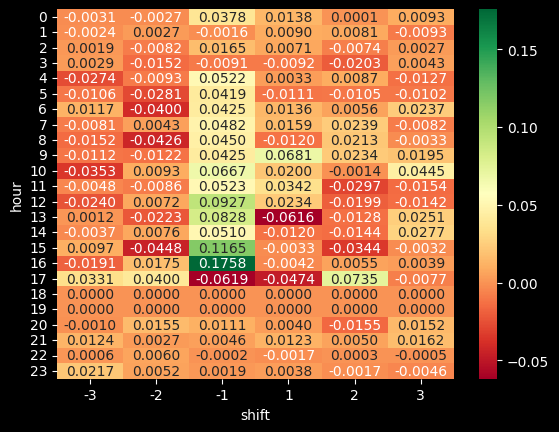

In [15]:
metrics_list = []
for hour in temp.hour.unique():
    metrics = calc_div_with_shift(pv[pv['hour']==hour][['sp500_div','ch_a50_div']], hour)
    metrics_list.append(metrics)
mdf = pd.concat(metrics_list)

mdf.columns = ['hour','shift','mean']

pv_m = mdf.pivot_table(values='mean',columns='shift',index='hour',aggfunc=sum)

sns.heatmap(pv_m, annot=True, fmt='.4f', cmap='RdYlGn')

2020-01-01T00:00:00.000000000
2020-02-01T00:00:00.000000000


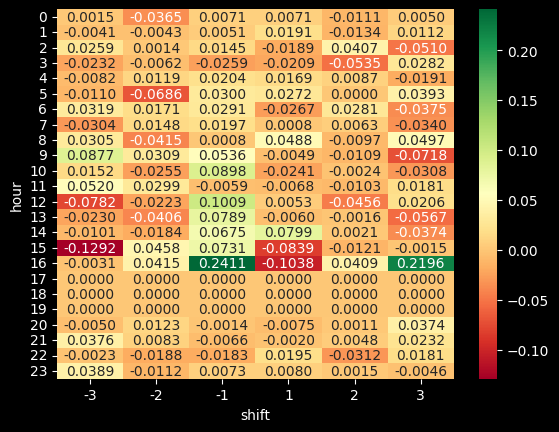

2020-03-01T00:00:00.000000000


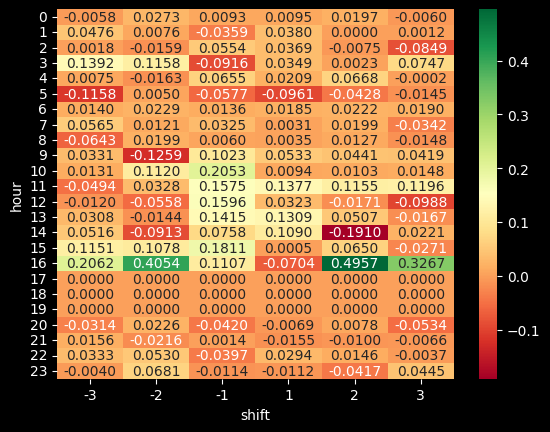

2020-04-01T00:00:00.000000000


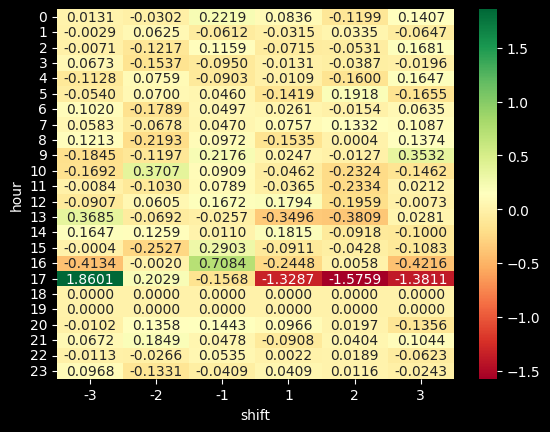

2020-05-01T00:00:00.000000000


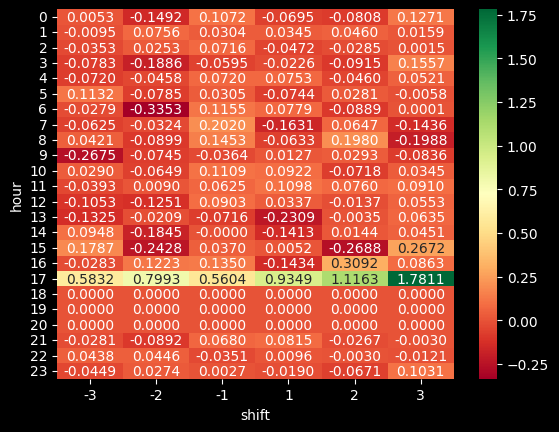

2020-06-01T00:00:00.000000000


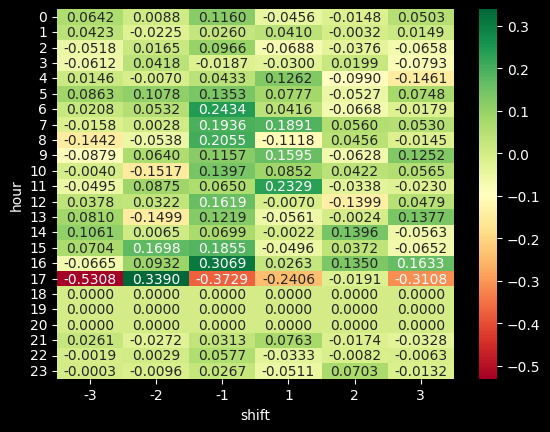

2020-07-01T00:00:00.000000000


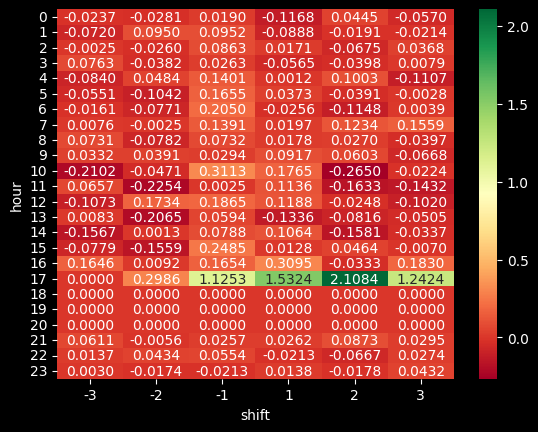

2020-08-01T00:00:00.000000000


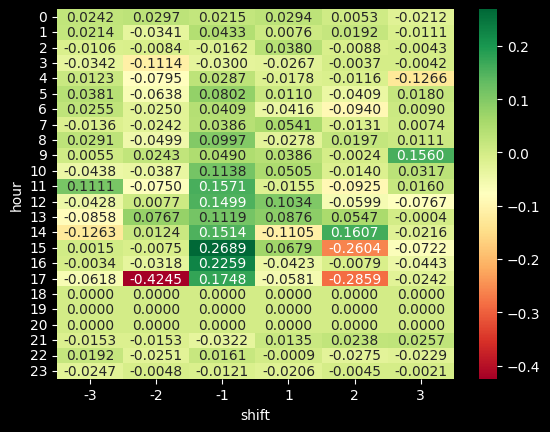

2020-09-01T00:00:00.000000000


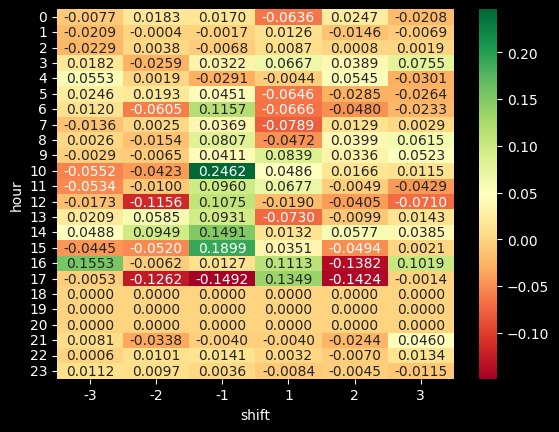

2020-10-01T00:00:00.000000000


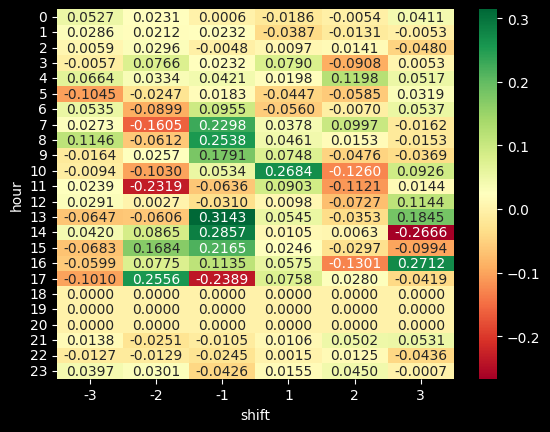

2020-11-01T00:00:00.000000000


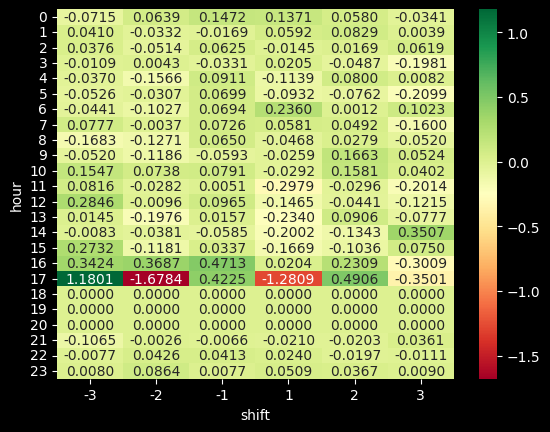

2020-12-01T00:00:00.000000000


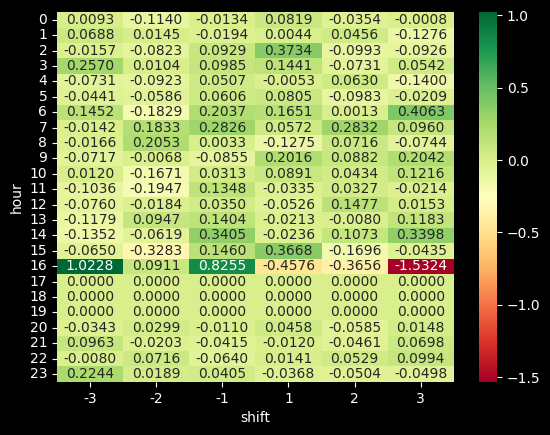

2021-01-01T00:00:00.000000000


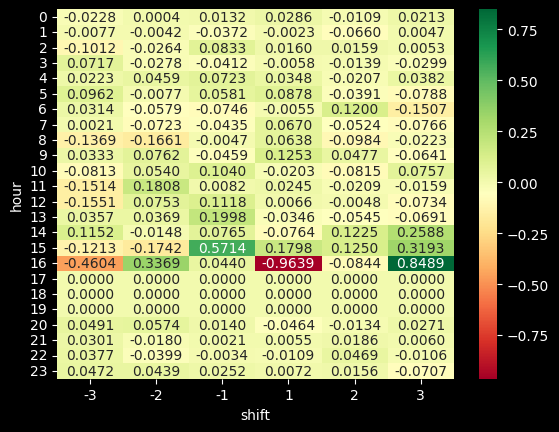

2021-02-01T00:00:00.000000000


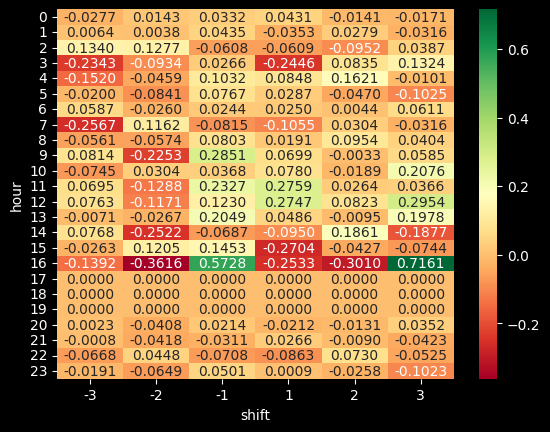

2021-03-01T00:00:00.000000000


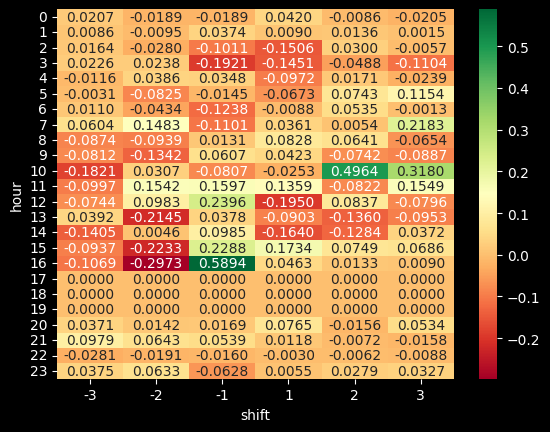

2021-04-01T00:00:00.000000000


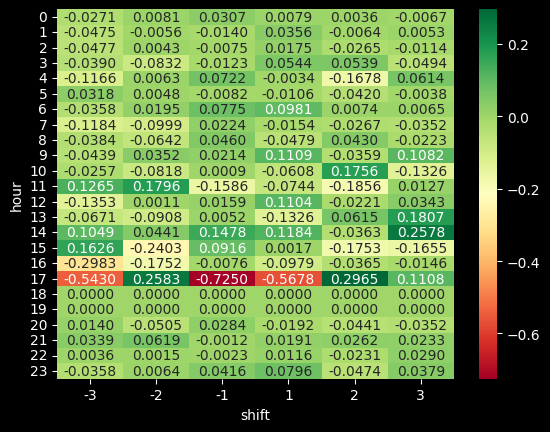

2021-05-01T00:00:00.000000000


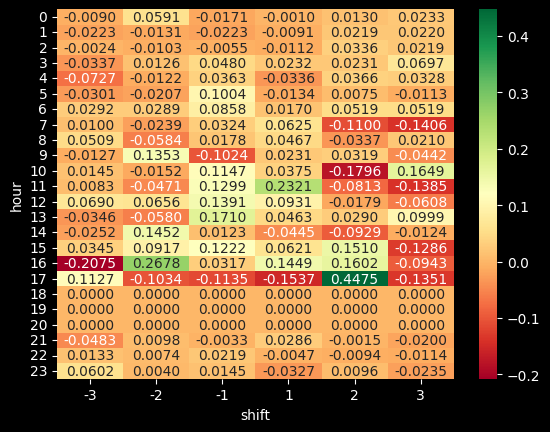

2021-06-01T00:00:00.000000000


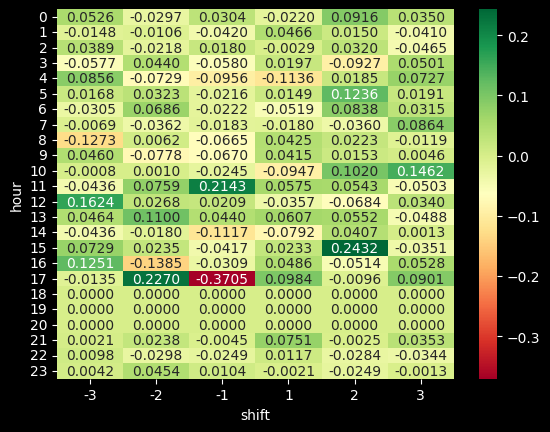

2021-07-01T00:00:00.000000000


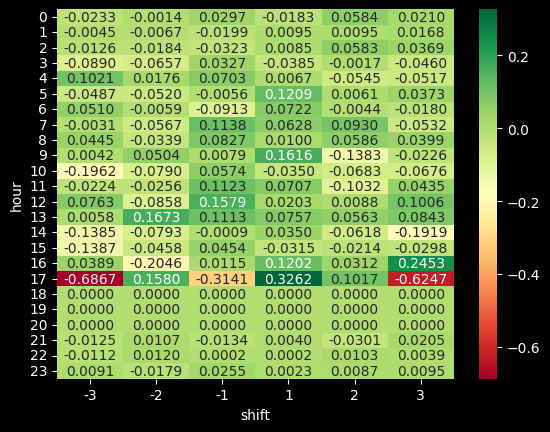

2021-08-01T00:00:00.000000000


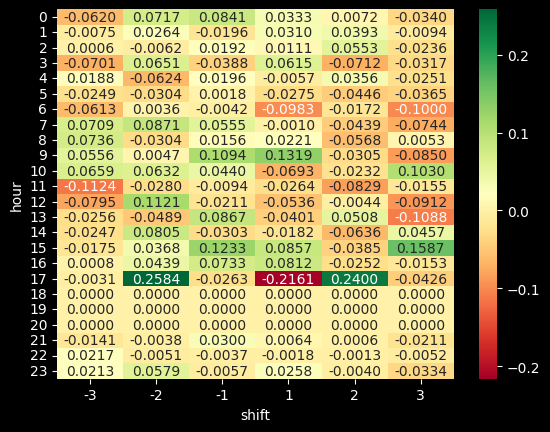

2021-09-01T00:00:00.000000000


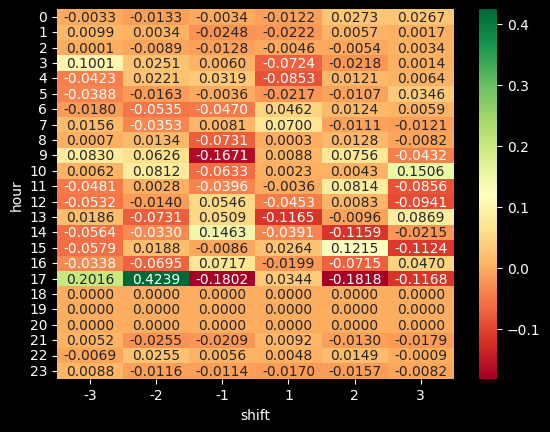

2021-10-01T00:00:00.000000000


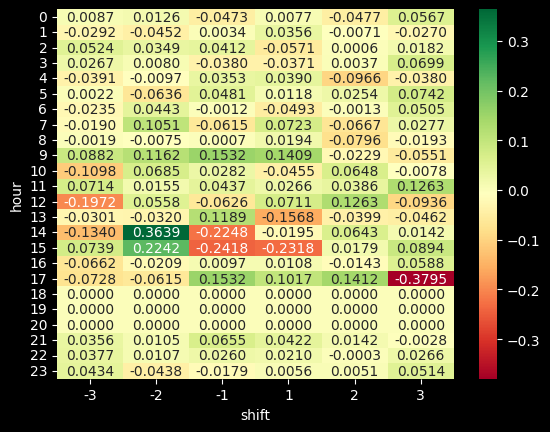

2021-11-01T00:00:00.000000000


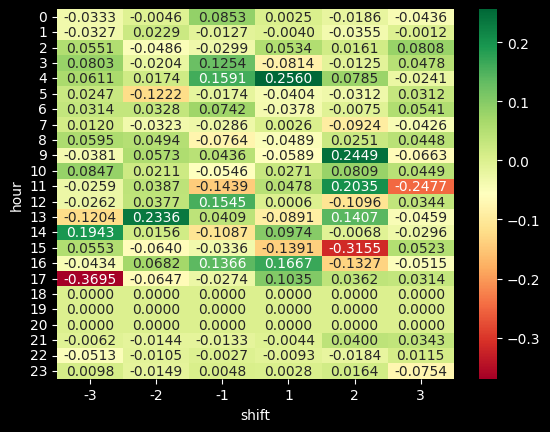

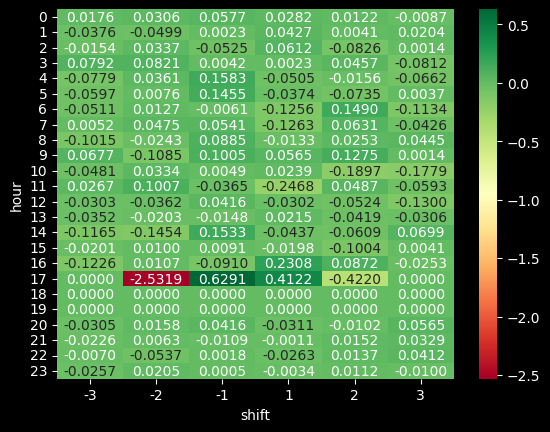

In [28]:
for month in pv['month'].unique():
    print(month)
    temp = pv[pv['month']==month]
    metrics_list = []
    for hour in temp.hour.unique():
        metrics = calc_div_with_shift(temp[temp['hour']==hour][['sp500_div','ch_a50_div']], hour)
        metrics_list.append(metrics)
    mdf = pd.concat(metrics_list)
    
    mdf.columns = ['hour','shift','mean']
    
    pv_m = mdf.pivot_table(values='mean',columns='shift',index='hour',aggfunc=sum)
    
    sns.heatmap(pv_m, annot=True, fmt='.4f', cmap='RdYlGn')

Во многих месяцах наблюдается смещение в периоды с 9 до 16 часов, то есть появляется системное смещение распределения и соответственно среднего отношения изменений в индесках. Простыми словами Китайский индекс отстаёт с вероятностью большей чем 50% отстает от Американского с лагом в одну минуту.

In [17]:
pv['ch_a50_div_shift'] = pv['ch_a50_div'].shift(-1)
pv['ch_a50_diff_shift'] = pv['ch_a50_diff'].shift(-1)
temp = pv[pv['hour'].isin([9,10,11,12,13,14,15,16])]

In [18]:
temp

10Y_tr    sp500   ch_a50          dt      month  hour  \
ts                                                                            
2020-01-02 09:00:00  128.656  3251.00  14615.0  2020-01-02 2020-01-01     9   
2020-01-02 09:01:00  128.625  3251.00  14617.5  2020-01-02 2020-01-01     9   
2020-01-02 09:02:00  128.640  3250.75  14617.5  2020-01-02 2020-01-01     9   
2020-01-02 09:03:00  128.640  3249.75  14620.0  2020-01-02 2020-01-01     9   
2020-01-02 09:04:00  128.625  3249.75  14622.5  2020-01-02 2020-01-01     9   
...                      ...      ...      ...         ...        ...   ...   
2021-11-30 16:55:00  131.484  4583.50      NaN  2021-11-30 2021-11-01    16   
2021-11-30 16:56:00      NaN  4584.50      NaN  2021-11-30 2021-11-01    16   
2021-11-30 16:57:00      NaN  4585.00      NaN  2021-11-30 2021-11-01    16   
2021-11-30 16:58:00      NaN  4585.25      NaN  2021-11-30 2021-11-01    16   
2021-11-30 16:59:00  131.500  4585.00      NaN  2021-11-30 2021-11-01    16   

                     10Y_tr_div  10Y_tr_diff  sp500_div  sp500_diff  \
ts                                                                    
2020-01-02 09:00:00    0.000000        0.000  -0.000154       -0.50   
2020-01-02 09:01:00   -0.000241       -0.031   0.000000        0.00   
2020-01-02 09:02:00    0.000117        0.015  -0.000077       -0.25   
2020-01-02 09:03:00    0.000000        0.000  -0.000308       -1.00   
2020-01-02 09:04:00   -0.000117       -0.015   0.000000        0.00   
...                         ...          ...        ...         ...   
2021-11-30 16:55:00    0.000122        0.016   0.000055        0.25   
2021-11-30 16:56:00         NaN          NaN   0.000218        1.00   
2021-11-30 16:57:00         NaN          NaN   0.000109        0.50   
2021-11-30 16:58:00         NaN          NaN   0.000055        0.25   
2021-11-30 16:59:00         NaN          NaN  -0.000055       -0.25   

                     ch_a50_div  ch_a50_diff  ch_a50_div_shift  \
ts                                                               
2020-01-02 09:00:00   -0.000171         -2.5          0.000171   
2020-01-02 09:01:00    0.000171          2.5          0.000000   
2020-01-02 09:02:00    0.000000          0.0          0.000171   
2020-01-02 09:03:00    0.000171          2.5          0.000171   
2020-01-02 09:04:00    0.000171          2.5         -0.000171   
...                         ...          ...               ...   
2021-11-30 16:55:00         NaN          NaN               NaN   
2021-11-30 16:56:00         NaN          NaN               NaN   
2021-11-30 16:57:00         NaN          NaN               NaN   
2021-11-30 16:58:00         NaN          NaN               NaN   
2021-11-30 16:59:00         NaN          NaN               NaN   

                     ch_a50_diff_shift  
ts                                      
2020-01-02 09:00:00                2.5  
2020-01-02 09:01:00                0.0  
2020-01-02 09:02:00                2.5  
2020-01-02 09:03:00                2.5  
2020-01-02 09:04:00               -2.5  
...                                ...  
2021-11-30 16:55:00                NaN  
2021-11-30 16:56:00                NaN  
2021-11-30 16:57:00                NaN  
2021-11-30 16:58:00                NaN  
2021-11-30 16:59:00                NaN  

[235019 rows x 14 columns]

In [19]:
temp['side'] = np.sign(temp['sp500_div'] * temp['ch_a50_div_shift'])

/tmp/ipykernel_4438/1353504985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['side'] = np.sign(temp['sp500_div'] * temp['ch_a50_div_shift'])


In [20]:
temp['side'].value_counts()

 1.0    73275
-1.0    66686
 0.0    65633
Name: side, dtype: int64

Еще одно подтверждение, что сонаправленные изменения в индексах S&P500 и CHINA_A50 c лагом в 1 минуту преобладают над разнонаправленными (73к против 66к). На ~70 тысячах наблюдений это различе статистически значимо. Также есть периоды когда цены закрытия двух последовательных минут по одному из индексов равны. В такие моменты в сделку не входим.

пробуем запустить простую МЛ модель, может получится что-то предсказывать.

Соберем небольшой датасет

In [21]:
%%time
array = temp[['sp500_div', 'sp500_diff','ch_a50_diff', 'ch_a50_div_shift']].values
dset = []
for i in range(temp.shape[0] - 15):
    # if i % 1000 == 0: print(i)
    t = array[i:i+15]
    dset.append(t.T.flatten())
dset = pd.DataFrame(dset)
dset = dset.dropna()

CPU times: user 5.2 s, sys: 177 ms, total: 5.37 s
Wall time: 5.37 s


In [22]:
train_size = int(dset.shape[0]*0.9)
X_train = dset.iloc[:train_size,:-1] 
X_test  = dset.iloc[train_size:,:-1]
y_train = dset.iloc[:train_size,-1]
y_test  = dset.iloc[train_size:,-1]

In [23]:
from xgboost import XGBRegressor
model = XGBRegressor(n_estimators=1000, max_depth=7, eta=0.1, subsample=0.7, colsample_bytree=0.8)
model.fit(X_train, y_train)
expected_y  = y_test
predicted_y = model.predict(X_test)

In [24]:
dset

0         1         2         3         4         5         6   \
0      -0.000154  0.000000 -0.000077 -0.000308  0.000000  0.000077  0.000000   
1       0.000000 -0.000077 -0.000308  0.000000  0.000077  0.000000 -0.000231   
2      -0.000077 -0.000308  0.000000  0.000077  0.000000 -0.000231 -0.000077   
3      -0.000308  0.000000  0.000077  0.000000 -0.000231 -0.000077 -0.000077   
4       0.000000  0.000077  0.000000 -0.000231 -0.000077 -0.000077  0.000000   
...          ...       ...       ...       ...       ...       ...       ...   
234942 -0.000164  0.000656  0.000492  0.000382  0.000000 -0.000382 -0.000546   
234943  0.000656  0.000492  0.000382  0.000000 -0.000382 -0.000546 -0.000984   
234944  0.000492  0.000382  0.000000 -0.000382 -0.000546 -0.000984 -0.000547   
234945  0.000382  0.000000 -0.000382 -0.000546 -0.000984 -0.000547 -0.000657   
234946  0.000000 -0.000382 -0.000546 -0.000984 -0.000547 -0.000657 -0.000274   

              7         8         9   ...        50        51        52  \
0      -0.000231 -0.000077 -0.000077  ...  0.000171  0.000000  0.000000   
1      -0.000077 -0.000077  0.000000  ...  0.000000  0.000000 -0.000171   
2      -0.000077  0.000000  0.000077  ...  0.000000 -0.000171 -0.000342   
3       0.000000  0.000077  0.000000  ... -0.000171 -0.000342  0.000342   
4       0.000077  0.000000  0.000077  ... -0.000342  0.000342  0.000000   
...          ...       ...       ...  ...       ...       ...       ...   
234942 -0.000984 -0.000547 -0.000657  ...  0.000130  0.000325 -0.000260   
234943 -0.000547 -0.000657 -0.000274  ...  0.000325 -0.000260 -0.000586   
234944 -0.000657 -0.000274 -0.000329  ... -0.000260 -0.000586 -0.000195   
234945 -0.000274 -0.000329 -0.000110  ... -0.000586 -0.000195 -0.000326   
234946 -0.000329 -0.000110  0.000439  ... -0.000195 -0.000326 -0.000130   

              53        54        55        56        57        58        59  
0      -0.000171 -0.000342  0.000342  0.000000 -0.000342  0.000000 -0.000171  
1      -0.000342  0.000342  0.000000 -0.000342  0.000000 -0.000171  0.000000  
2       0.000342  0.000000 -0.000342  0.000000 -0.000171  0.000000  0.000000  
3       0.000000 -0.000342  0.000000 -0.000171  0.000000  0.000000  0.000000  
4      -0.000342  0.000000 -0.000171  0.000000  0.000000  0.000000  0.000171  
...          ...       ...       ...       ...       ...       ...       ...  
234942 -0.000586 -0.000195 -0.000326 -0.000130  0.000065  0.000000  0.000586  
234943 -0.000195 -0.000326 -0.000130  0.000065  0.000000  0.000586  0.000260  
234944 -0.000326 -0.000130  0.000065  0.000000  0.000586  0.000260  0.000065  
234945 -0.000130  0.000065  0.000000  0.000586  0.000260  0.000065  0.000521  
234946  0.000065  0.000000  0.000586  0.000260  0.000065  0.000521 -0.000130  

[158085 rows x 60 columns]

<AxesSubplot: xlabel='59'>

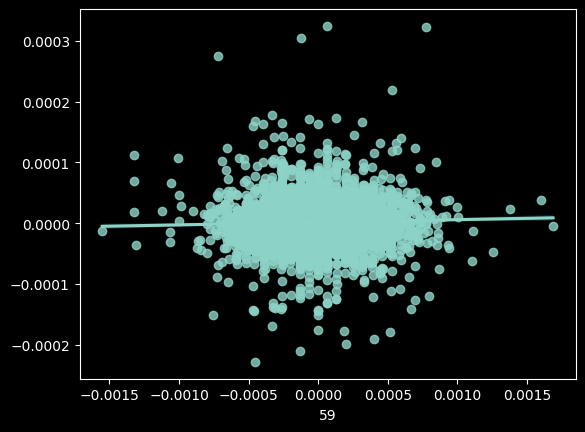

In [25]:
sns.regplot(x = expected_y, y = predicted_y)

Сходу обучить модель выявлять зависимость не получилось, вероятно стоит увеличить число признаков, добавить сложности. Ожидалось, что точки будут назодиться ближе к линии под углом 45 градусов, проходящей через 0. Обучать вторую нет смысла, потому что эта не дала никакой объясняющей силы.

Также я нашел несколько статей и материалов, в которых исследователи пробуюу решать схожую задачу. Следующим этапом стоит пробовать использовать чужой опыт.

[VECM](https://www.kaggle.com/code/saritm/vector-error-correction-fx)

[A Multi-market Comparison of the Intraday Lead–Lag Relations Among Stock Index-Based Spot, Futures and Options | Computational Economics](https://link.springer.com/article/10.1007/s10614-022-10268-0)

[Estimation of the lead-lag parameter from non-synchronous data](https://github.com/philipperemy/lead-lag)

А также несколько пэйперов.
[1](https://disk.yandex.ru/i/w-GbECnC8p06kw)
[2](https://disk.yandex.ru/i/oDzmTAPF3pXZqw)
[3](https://disk.yandex.ru/i/6YlGgMg2nQ1n4A)
[4](https://disk.yandex.ru/i/aP9j0b4KhDkyeQ)
[5](https://disk.yandex.ru/i/hvDmrRoKKmvMBQ)